In [ ]:


def weisfeiler_lehman_step(graph, labels):
    new_labels = {}
    for node in graph.nodes():
        neighborhood = [labels[neighbor] for neighbor in graph.neighbors(node)]
        new_labels[node] = (labels[node], tuple(sorted(neighborhood)))
    return new_labels

def weisfeiler_lehman(graph, iterations=3):
    # Initialize the labels as the degree of the nodes
    labels = {node: graph.degree[node] for node in graph.nodes()}
    
    # Run the Weisfeiler-Lehman iterations
    for i in range(iterations):
        labels = weisfeiler_lehman_step(graph, labels)
        
        # Relabel with sorted tuple of neighbors' labels
        unique_labels = {key: idx for idx, key in enumerate(sorted(set(labels.values())))}
        labels = {node: unique_labels[labels[node]] for node in graph.nodes()}
        
    # Return the final set of labels as a sorted tuple (graph invariant)
    return tuple(sorted(labels.values()))

def are_isomorphic(graph1, graph2, iterations=3):
    # Compute WL labels for both graphs
    wl_graph1 = weisfeiler_lehman(graph1, iterations)
    wl_graph2 = weisfeiler_lehman(graph2, iterations)
    
    # Compare the labels (graph invariants)
    return wl_graph1 == wl_graph2

# Example usage
if __name__ == "__main__":
    # Define two example graphs
    G1 = nx.Graph()
    G1.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5)])

    G2 = nx.Graph()
    G2.add_edges_from([(1, 2), (1, 3), (2, 5), (3, 4)])

    # Check if the two graphs are isomorphic
    is_isomorphic = are_isomorphic(G1, G2)
    print("Are the graphs isomorphic?", is_isomorphic)

In [ ]:
# Graph 1

G = nx.Graph()

G.add_edges_from([
    (1,5),(1,6),(1,7)
])

In [3]:
import networkx as nx
from collections import defaultdict

# Weisfeiler-Lehman step: update node labels based on neighbors' labels
def weisfeiler_lehman_step(graph, labels):
    new_labels = {}
    for node in graph.nodes():
        neighborhood = [labels[neighbor] for neighbor in graph.neighbors(node)]
        new_labels[node] = (labels[node], tuple(sorted(neighborhood)))
    return new_labels

# Full Weisfeiler-Lehman procedure
def weisfeiler_lehman(graph, iterations=3):
    # Initialize labels: start with the degree of the nodes
    labels = {node: graph.degree[node] for node in graph.nodes()}
    
    # Run Weisfeiler-Lehman iterations
    for i in range(iterations):
        labels = weisfeiler_lehman_step(graph, labels)
        
        # Relabel with sorted tuple of neighbors' labels
        unique_labels = {key: idx for idx, key in enumerate(sorted(set(labels.values())))}
        labels = {node: unique_labels[labels[node]] for node in graph.nodes()}

    print(f"Unique labels {unique_labels} \n labels {labels}")
        
    # Return the final set of labels as a sorted tuple (graph invariant)
    return tuple(sorted(labels.values()))

# Function to check if two graphs are isomorphic using WL test
def are_isomorphic(graph1, graph2, iterations=3):
    wl_graph1 = weisfeiler_lehman(graph1, iterations)
    wl_graph2 = weisfeiler_lehman(graph2, iterations)
    return wl_graph1 == wl_graph2

# Define Graph 1 (Bipartite Graph)
G1 = nx.Graph()
left_set = [1, 2, 3, 4]
right_set = [5, 6, 7, 8]
edges = [
    (1, 5), (1, 6), (1, 7),
    (2, 5), (2, 6), (2, 8),
    (3, 5), (3, 7), (3, 8),
    (4, 6), (4, 7), (4, 8)
]
G1.add_edges_from(edges)

# Define Graph 2 (Cube Graph)
G2 = nx.Graph()
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'G'),
    ('B', 'D'), ('B', 'H'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'F'),
    ('E', 'F'), ('E', 'G'),
    ('F', 'H'), ('G', 'H')
]
G2.add_edges_from(edges)

# Run the Weisfeiler-Lehman test on both graphs
is_isomorphic = are_isomorphic(G1, G2)

# Output the result
print("Are the graphs isomorphic based on WL test?", is_isomorphic)

Unique labels {(0, (0, 0, 0)): 0} 
 labels {1: 0, 5: 0, 6: 0, 7: 0, 2: 0, 8: 0, 3: 0, 4: 0}
Unique labels {(0, (0, 0, 0)): 0} 
 labels {'A': 0, 'B': 0, 'C': 0, 'G': 0, 'D': 0, 'H': 0, 'E': 0, 'F': 0}
Are the graphs isomorphic based on WL test? True


# Question 3

Question 3 [20pts] (old midterm exam part B) 

Let's talk about Board Games. [Graph Drawing Conference Creative Contest 2023] This dataset has the top-40 games found on BoardGameGeek. You can construct a graph, where every board game is a node. Two nodes (board games) are connected through a directed edge if players of one game also like another game. Additionally, each game contains some metadata. The format given for each game is JSON records in an array. An ID is assigned to each game, and the entry “recommendations”/”fans_liked” contains a list of other IDs (other games) that players of this game liked (to create the directed edges). You can also work with undirected graphs instead of directed ones. Use pandas to read the JSON files. For this task: 

- [2pts] Create a “fans_liked” graph from the JSON records. Each game is a node and through the recommendation/”fans_liked” connect them. Visualize at least the top-40 games. 
- [2pts] Use node2vec to get the node embeddings and draw them on the 2D space. Again, you might only consider the top 40 games. 
- [2pts] Create a couple of bipartite graphs (affiliation graphs) by using the other metadata. As an example one node set is the games and the other node set can be the foci (different categories/design etc). Visualize it. 
- [2pts] Create the projected graphs of (c). Two games are connected if they have the same designer or the same category. Visualize. 
- [10pts] Define an interesting problem for this dataset, and design and implement a solution for this problem. 
- [2pts] Provide a report with your findings and the source code. Provide the source code. You can decide what tool to use. Note: You are free to decide which parts of the data to visualize and how to visualize it. Solution: Link of code

In [22]:
import networkx as nx
import json 
from collections import defaultdict
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt


In [18]:

# Load JSON data from a file
with open('q3_data.json') as f:
    data = json.load(f)

# Convert JSON data to a networkx graph
G = nx.Graph()
for i in data : 
    # print(i['id'],i['recommendations']['fans_liked'])

    for j in i['recommendations']['fans_liked'] :

        G.add_edge(i['id'] , j)



In [32]:
len(data)

40

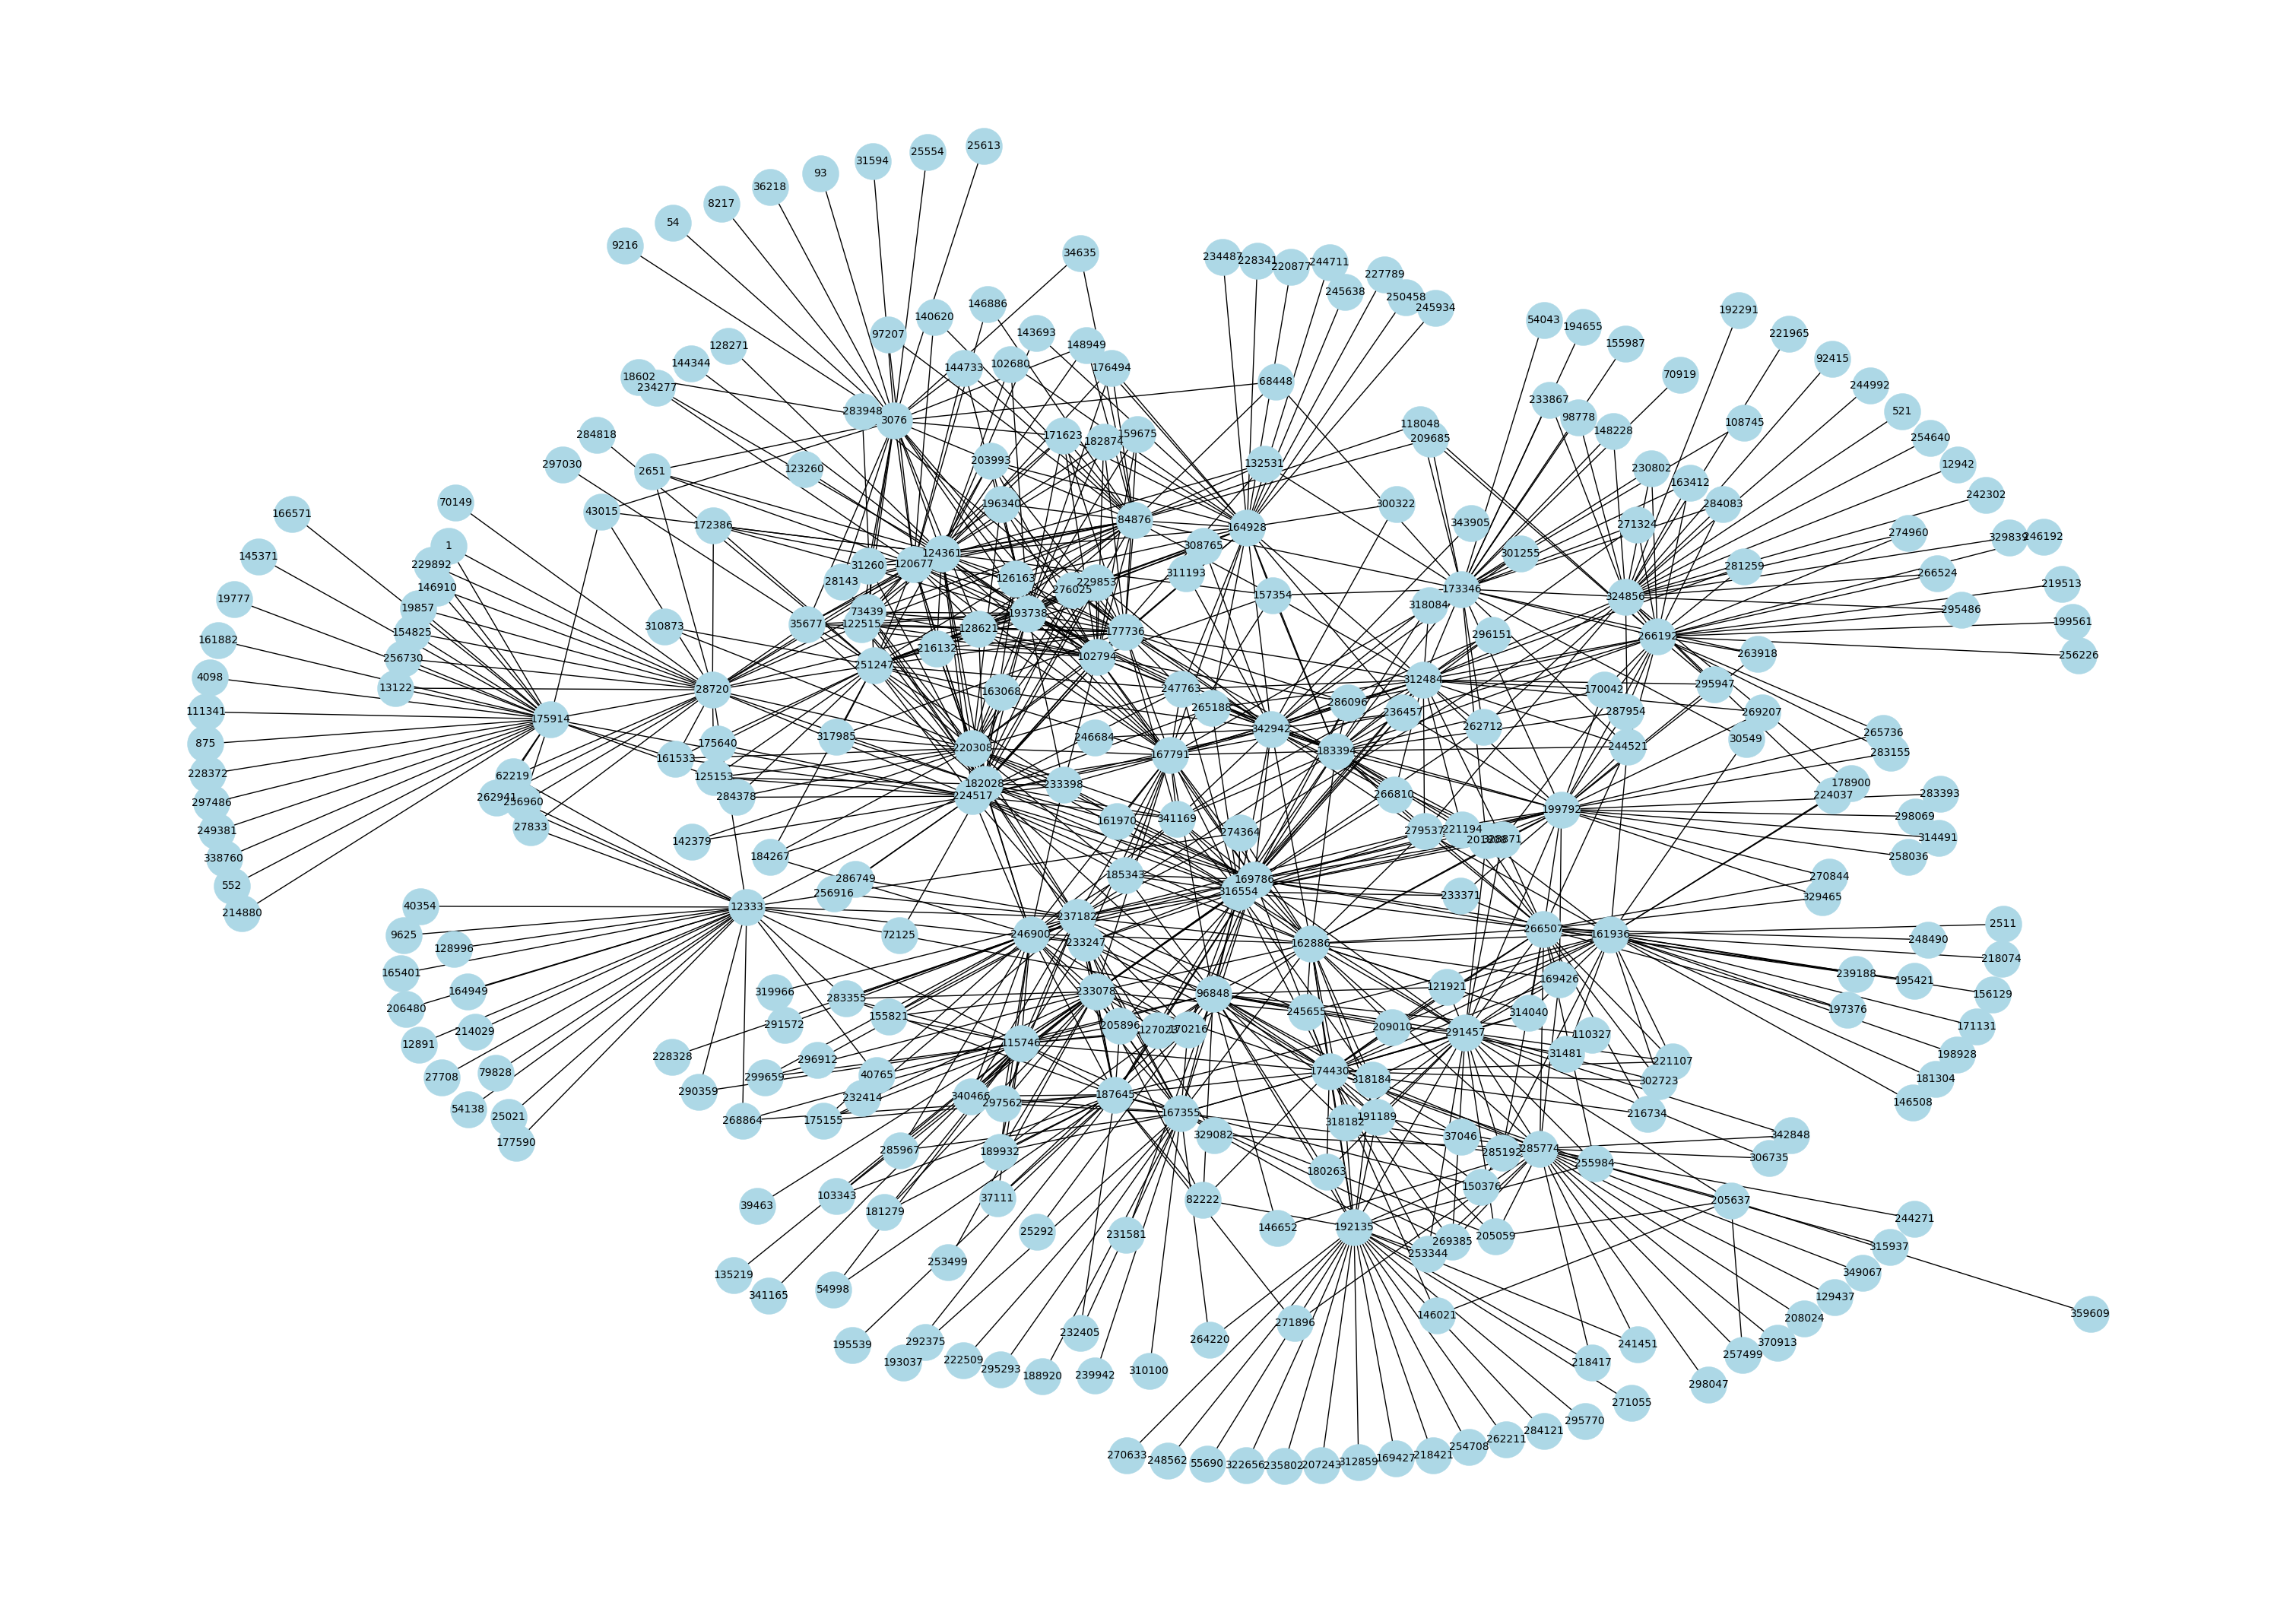

In [35]:

plt.figure(figsize=(30,21))
graph_pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G, pos = graph_pos, node_size=1200, node_color='lightblue', linewidths=0.25,font_size=10, with_labels=True)

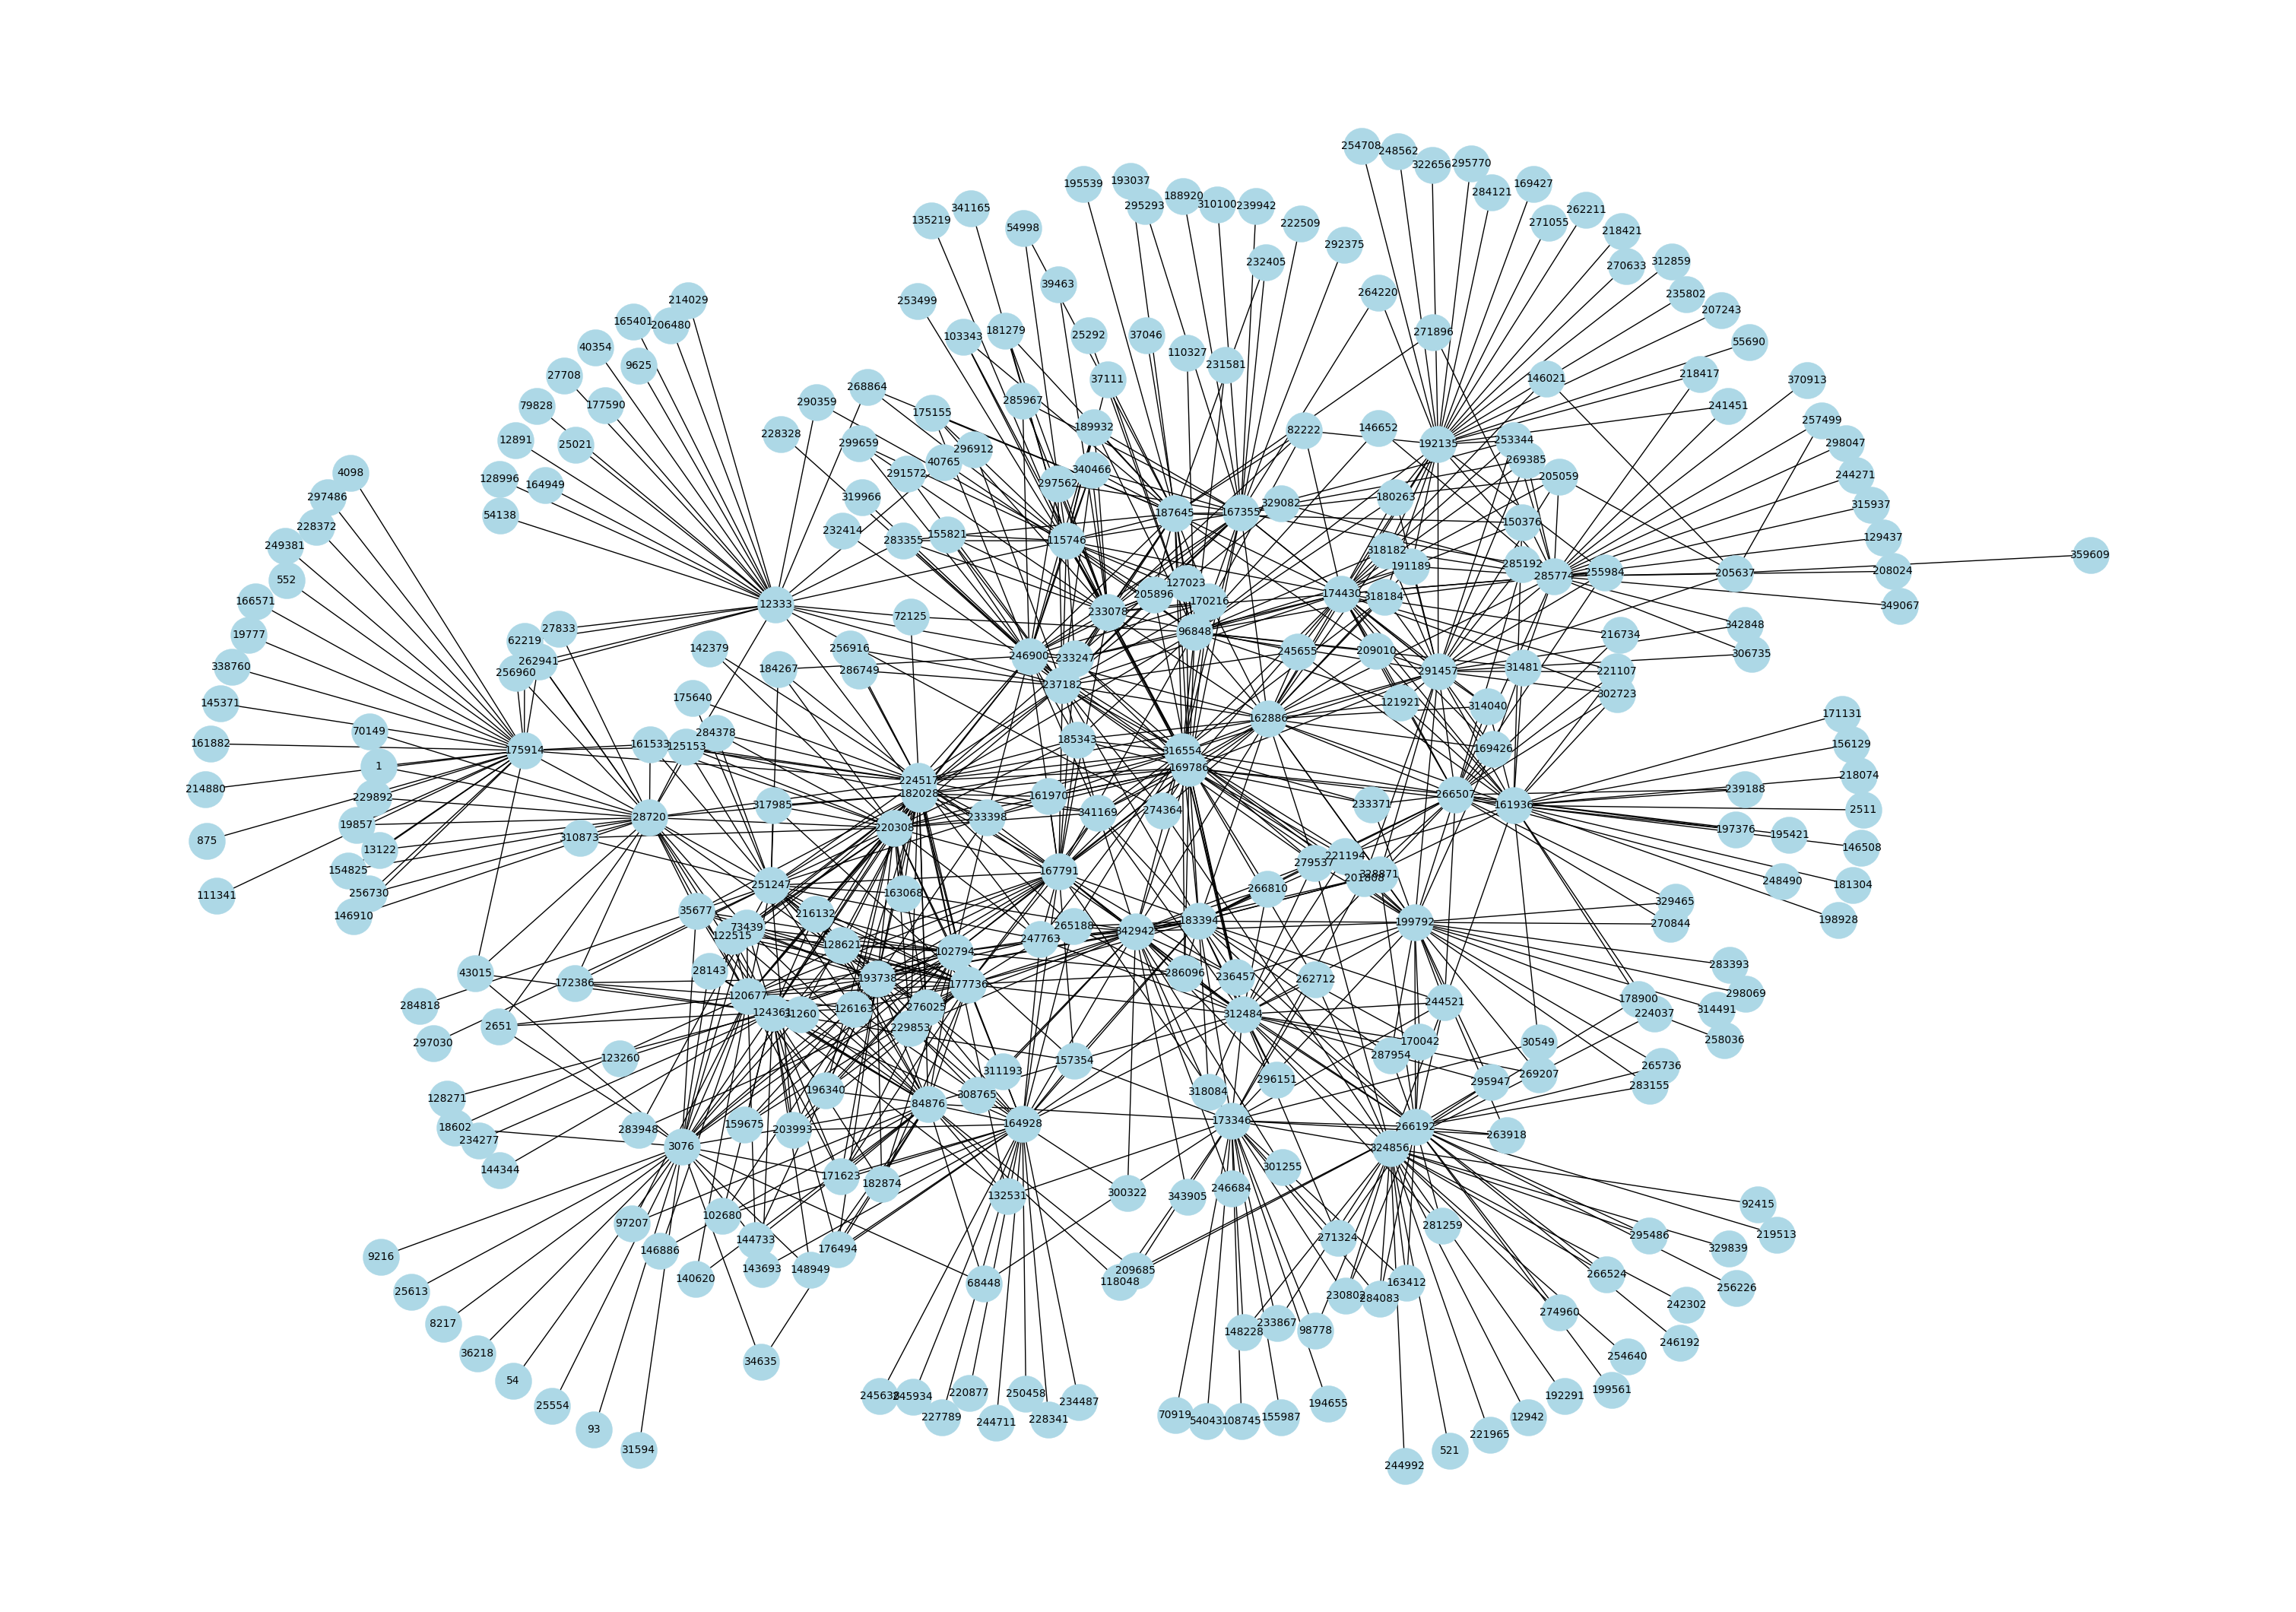

In [34]:

plt.figure(figsize=(30,21))
graph_pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos = graph_pos, node_size=1200, node_color='lightblue', linewidths=0.25,font_size=10, with_labels=True)